# Homework 1 Reperimento dell'Informazione
---
Eleonora Miani 1206908

## Evaluation Results Extraction

In [1]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None 

# Function to import a csv file into a dataframe
def importCSV(path):
    file = str(path)
    dataframe = pd.read_csv(file,sep=';',index_col=0)
    return dataframe

# Function to extract the evaluations measures (map, Rprec, P_10) both global and for each topic
def extractEvaluationMeasures(dataframe, model):
    #dataframe.loc[]
    
    # extract the needed values: map, Rprec and P_10
    map = dataframe.loc['map']
    map['Value'] = map.loc[:,'Value'].astype(float)
    
    Rprec = dataframe.loc['Rprec']
    Rprec['Value'] = Rprec.loc[:,'Value'].astype(float)
    
    P_10 = dataframe.loc['P_10']
    P_10['Value'] = P_10.loc[:,'Value'].astype(float)
    
    # creates a new dataframe displaying the measures for each Topic
    tmp = pd.merge(map, Rprec, how='inner', on=['Topic'])
    tmp = pd.merge(tmp, P_10, how='inner', on=['Topic'])
    
    tmp = tmp.rename({'Value_x':'map', 'Value_y':'Rprec', 'Value':'P_10'}, axis='columns')
    
    # add a column that specifies the retrieval model used
    tmp.insert(0, 'Model', model)
    
    globalMeasures = tmp.loc[(tmp['Topic']=='all')].drop(['Topic'], axis=1).reset_index(drop=True)
    
    byTopicMeasures = tmp.loc[(tmp['Topic']!='all')]
    
    return globalMeasures, byTopicMeasures


file1_BM25_Stoplist_Stemmer = importCSV("Evaluation/1-BM25-Stoplist-Stemmer/1-BM25-Stoplist-Stemmer.csv")
file2_TF_IDF_Stoplist_Stemmer = importCSV("Evaluation/2-TF_IDF-Stoplist-Stemmer/2-TF_IDF-Stoplist-Stemmer.csv")
file3_BM25_Stemmer = importCSV("Evaluation/3-BM25-Stemmer/3-BM25-Stemmer.csv")
file4_TF_IDF = importCSV("Evaluation/4-TF_IDF/4-TF_IDF.csv")

file1_globalMeasures, file1_byTopicMeasures = extractEvaluationMeasures(file1_BM25_Stoplist_Stemmer, "BM25_Stoplist_Stemmer")
file2_globalMeasures, file2_byTopicMeasures = extractEvaluationMeasures(file2_TF_IDF_Stoplist_Stemmer, "TF_IDF_Stoplist_Stemmer")
file3_globalMeasures, file3_byTopicMeasures = extractEvaluationMeasures(file3_BM25_Stemmer, "BM25_Stemmer")
file4_globalMeasures, file4_byTopicMeasures = extractEvaluationMeasures(file4_TF_IDF, "TF_IDF")

globalMeasures = pd.concat([file1_globalMeasures,file2_globalMeasures,file3_globalMeasures,file4_globalMeasures])
byTopicMeasures = pd.concat([file1_byTopicMeasures,file2_byTopicMeasures,file3_byTopicMeasures,file4_byTopicMeasures])

display(globalMeasures)
display(byTopicMeasures)



,Model,map,Rprec,P_10
0,BM25_Stoplist_Stemmer,0.2125,0.2705,0.482
0,TF_IDF_Stoplist_Stemmer,0.2123,0.2725,0.478
0,BM25_Stemmer,0.1245,0.1701,0.302
0,TF_IDF,0.1876,0.2485,0.426


,Model,Topic,map,Rprec,P_10
0,BM25_Stoplist_Stemmer,351,0.5229,0.5208,1.0
1,BM25_Stoplist_Stemmer,352,0.0237,0.0772,0.4
2,BM25_Stoplist_Stemmer,353,0.2362,0.4262,0.5
3,BM25_Stoplist_Stemmer,354,0.1677,0.2853,0.5
4,BM25_Stoplist_Stemmer,355,0.1332,0.2444,0.4
5,BM25_Stoplist_Stemmer,356,0.0106,0.0000,0.0
6,BM25_Stoplist_Stemmer,357,0.2956,0.3926,0.8
7,BM25_Stoplist_Stemmer,358,0.2997,0.3137,0.6
8,BM25_Stoplist_Stemmer,359,0.0462,0.0714,0.2
9,BM25_Stoplist_Stemmer,360,0.2238,0.3576,0.4


## Plots of MAP values of each system

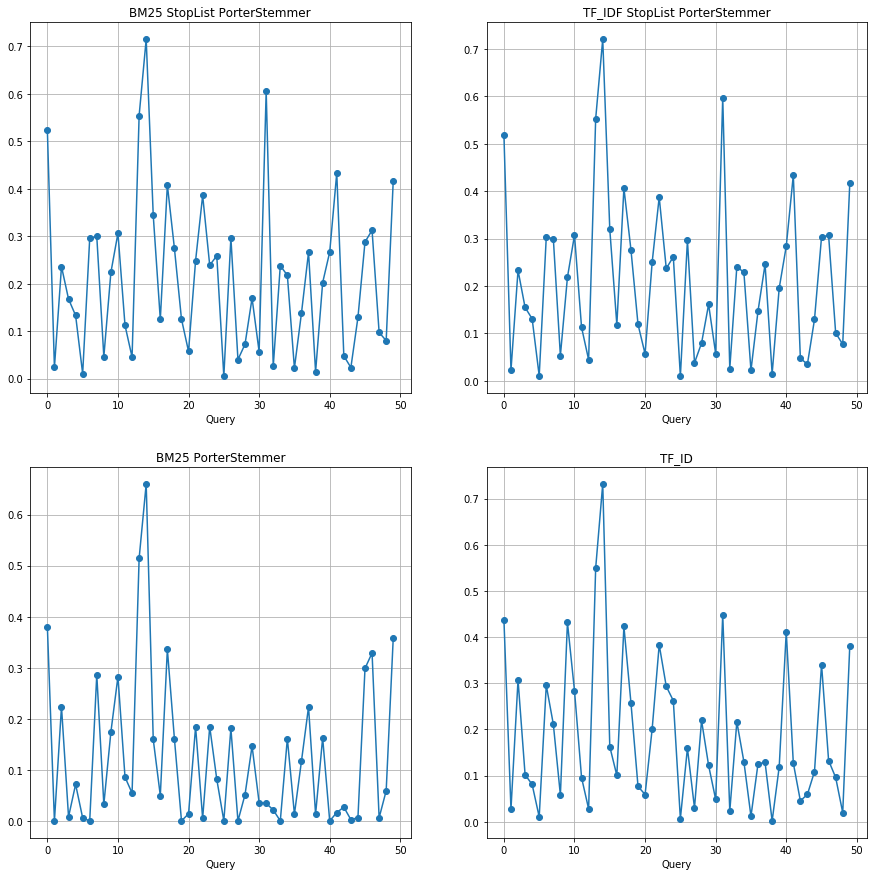

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,15))

ax1 = plt.subplot2grid((2,2), (0,0),)
ax2 = plt.subplot2grid((2,2), (0,1),)
ax3 = plt.subplot2grid((2,2), (1,0),)
ax4 = plt.subplot2grid((2,2), (1,1),)

ax1.plot(file1_byTopicMeasures['map'],marker='o')
ax2.plot(file2_byTopicMeasures['map'],marker='o')
ax3.plot(file3_byTopicMeasures['map'],marker='o')
ax4.plot(file4_byTopicMeasures['map'],marker='o')


ax1.set_title('BM25 StopList PorterStemmer')
ax1.set_xlabel('Query')
ax1.grid(True)

ax2.set_title('TF_IDF StopList PorterStemmer')
ax2.set_xlabel('Query')
ax2.grid(True)

ax3.set_title('BM25 PorterStemmer')
ax3.set_xlabel('Query')
ax3.grid(True)

ax4.set_title('TF_ID')
ax4.set_xlabel('Query')
ax4.grid(True)

plt.show()

## Plots of Rprec values of each system

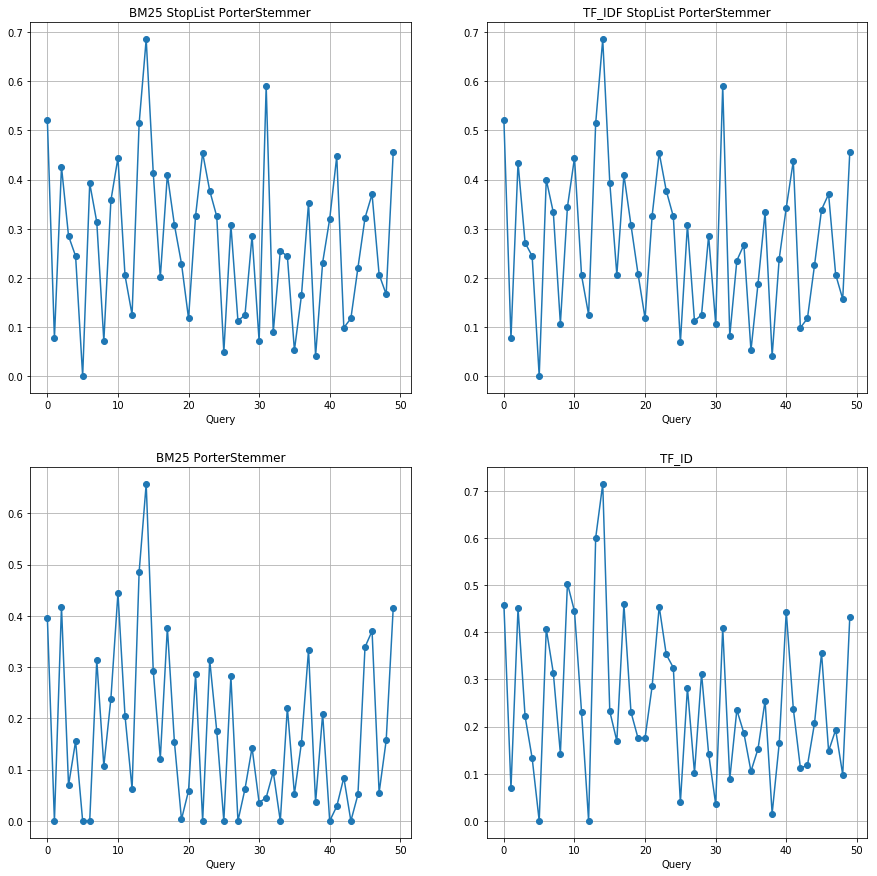

In [6]:
fig = plt.figure(figsize=(15,15))

ax1 = plt.subplot2grid((2,2), (0,0),)
ax2 = plt.subplot2grid((2,2), (0,1),)
ax3 = plt.subplot2grid((2,2), (1,0),)
ax4 = plt.subplot2grid((2,2), (1,1),)

ax1.plot(file1_byTopicMeasures['Rprec'],marker='o')
ax2.plot(file2_byTopicMeasures['Rprec'],marker='o')
ax3.plot(file3_byTopicMeasures['Rprec'],marker='o')
ax4.plot(file4_byTopicMeasures['Rprec'],marker='o')

ax1.set_title('BM25 StopList PorterStemmer')
ax1.set_xlabel('Query')
ax1.grid(True)

ax2.set_title('TF_IDF StopList PorterStemmer')
ax2.set_xlabel('Query')
ax2.grid(True)

ax3.set_title('BM25 PorterStemmer')
ax3.set_xlabel('Query')
ax3.grid(True)

ax4.set_title('TF_ID')
ax4.set_xlabel('Query')
ax4.grid(True)

plt.show()

## Plots of P_10 values of each system 

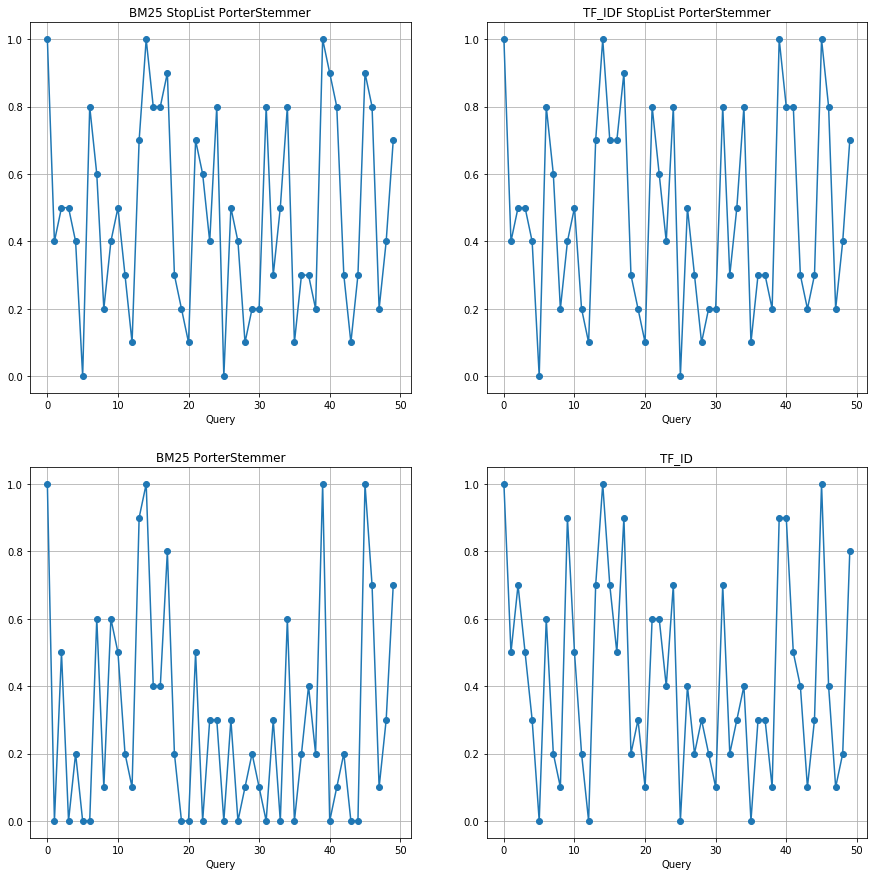

In [7]:
fig = plt.figure(figsize=(15,15))

ax1 = plt.subplot2grid((2,2), (0,0),)
ax2 = plt.subplot2grid((2,2), (0,1),)
ax3 = plt.subplot2grid((2,2), (1,0),)
ax4 = plt.subplot2grid((2,2), (1,1),)

ax1.plot(file1_byTopicMeasures['P_10'],marker='o')
ax2.plot(file2_byTopicMeasures['P_10'],marker='o')
ax3.plot(file3_byTopicMeasures['P_10'],marker='o')
ax4.plot(file4_byTopicMeasures['P_10'],marker='o')

ax1.set_title('BM25 StopList PorterStemmer')
ax1.set_xlabel('Query')
ax1.grid(True)

ax2.set_title('TF_IDF StopList PorterStemmer')
ax2.set_xlabel('Query')
ax2.grid(True)

ax3.set_title('BM25 PorterStemmer')
ax3.set_xlabel('Query')
ax3.grid(True)

ax4.set_title('TF_ID')
ax4.set_xlabel('Query')
ax4.grid(True)

plt.show()

## Boxplot of MAP values grouped by system 

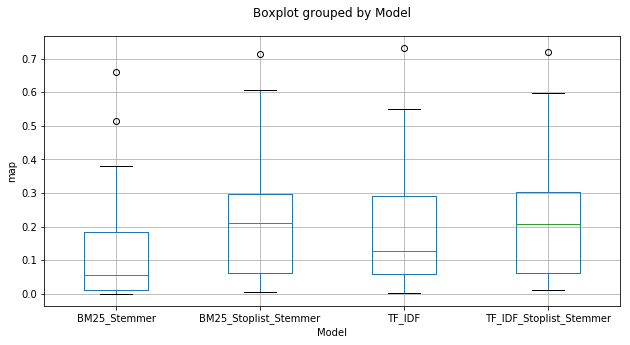

In [8]:
byTopicMeasures.boxplot('map', by='Model', figsize=(10, 5))
plt.title("")
plt.ylabel("map")
plt.xlabel("Model")
plt.show()

## Boxplot of Rprec values grouped by system 

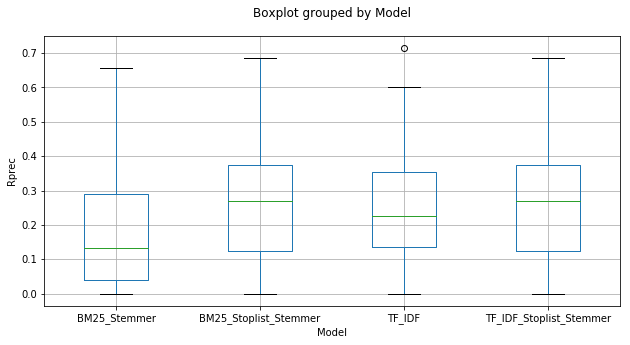

In [9]:
byTopicMeasures.boxplot('Rprec', by='Model', figsize=(10, 5))
plt.title("")
plt.ylabel("Rprec")
plt.xlabel("Model")
plt.show()

## Boxplot of P_10 values grouped by system 

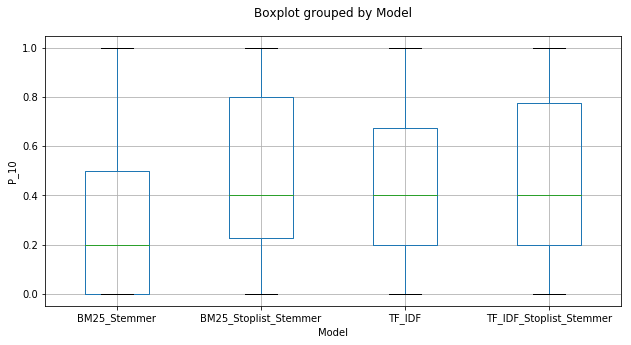

In [10]:
byTopicMeasures.boxplot('P_10', by='Model', figsize=(10, 5))
plt.title("")
plt.ylabel("P_10")
plt.xlabel("Model")
plt.show()

# ANOVA Test
---

In [11]:
from scipy import stats

# map
F_value, p_value = stats.f_oneway(file1_byTopicMeasures['map'], 
                      file2_byTopicMeasures['map'], 
                      file3_byTopicMeasures['map'], 
                      file4_byTopicMeasures['map'])

print("ANOVA test on MAP:")
print("F-value: " + str(F_value))
print("p-value: " + str(p_value))
print("\n")

# Rprec
F_value, p_value = stats.f_oneway(file1_byTopicMeasures['Rprec'], 
                      file2_byTopicMeasures['Rprec'], 
                      file3_byTopicMeasures['Rprec'], 
                      file4_byTopicMeasures['Rprec'])

print("ANOVA test on Rprec:")
print("F-value: " + str(F_value))
print("p-value: " + str(p_value))
print("\n")

# P_10
F_value, p_value = stats.f_oneway(file1_byTopicMeasures['P_10'], 
                      file2_byTopicMeasures['P_10'], 
                      file3_byTopicMeasures['P_10'], 
                      file4_byTopicMeasures['P_10'])

print("ANOVA test on P_10:")
print("F-value: " + str(F_value))
print("p-value: " + str(p_value))

ANOVA test on MAP:
F-value: 3.276239569877693
p-value: 0.02214360820320229


ANOVA test on Rprec:
F-value: 4.560140109254023
p-value: 0.00411143680902894


ANOVA test on P_10:
F-value: 3.8806068502793134
p-value: 0.010032554063785504


---
`p-value` $< \alpha = 0.05$ per ciascuna delle misure di valutazione, quindi la null hypothesis viene rifiutata. Ciò significa che le variazioni nei valori di `MAP`, `Rprec` e `P_10`sono rilevanti, e che i quattro diversi sistemi
considerati portano a risultati significativamente differenti.

---

# Tukey's Test
---

In [12]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

tukeysTest_map = MultiComparison(byTopicMeasures['map'], byTopicMeasures['Model']).tukeyhsd()
tukeysTest_Rprec = MultiComparison(byTopicMeasures['Rprec'], byTopicMeasures['Model']).tukeyhsd()
tukeysTest_P_10 = MultiComparison(byTopicMeasures['P_10'], byTopicMeasures['Model']).tukeyhsd()

print('Tukey\'s Test on MAP')
print(tukeysTest_map.summary())
print("\n")

print('Tukey\'s Test on Rprec')
print(tukeysTest_Rprec.summary())
print("\n")

print('Tukey\'s Test on P_10')
print(tukeysTest_P_10.summary())


Tukey's Test on MAP
             Multiple Comparison of Means - Tukey HSD,FWER=0.05             
        group1                 group2         meandiff  lower  upper  reject
----------------------------------------------------------------------------
     BM25_Stemmer      BM25_Stoplist_Stemmer   0.088    0.004  0.1721  True 
     BM25_Stemmer              TF_IDF          0.0632  -0.0209 0.1472 False 
     BM25_Stemmer     TF_IDF_Stoplist_Stemmer  0.0878   0.0037 0.1718  True 
BM25_Stoplist_Stemmer          TF_IDF         -0.0249  -0.1089 0.0591 False 
BM25_Stoplist_Stemmer TF_IDF_Stoplist_Stemmer -0.0003  -0.0843 0.0838 False 
        TF_IDF        TF_IDF_Stoplist_Stemmer  0.0246  -0.0594 0.1087 False 
----------------------------------------------------------------------------


Tukey's Test on Rprec
             Multiple Comparison of Means - Tukey HSD,FWER=0.05             
        group1                 group2         meandiff  lower  upper  reject
--------------------------------

---
The results of the Tukey's test reveal that the BM25 model with PorterStemmer and no Stoplist is the system that significantly differs from the other 3.

---

## Plots of Tukey's test on MAP

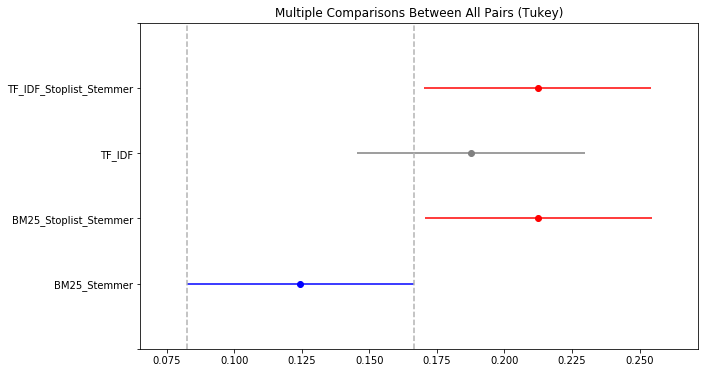

In [13]:
tukeysTest_map.plot_simultaneous(comparison_name="BM25_Stemmer")
plt.show()

## Plots of Tukey's test on Rprec

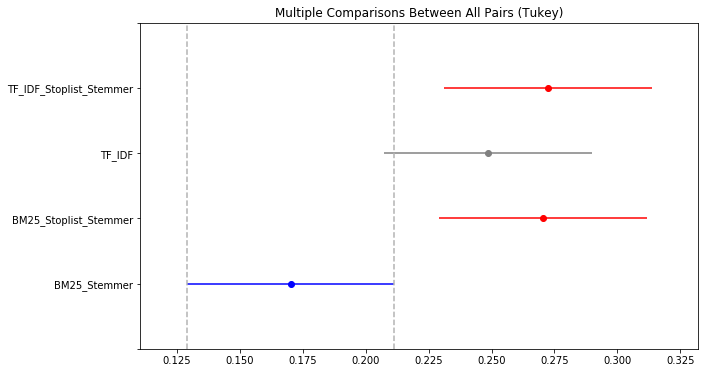

In [14]:
tukeysTest_Rprec.plot_simultaneous(comparison_name="BM25_Stemmer")
plt.show()

## Plots of Tukey's test on P_10

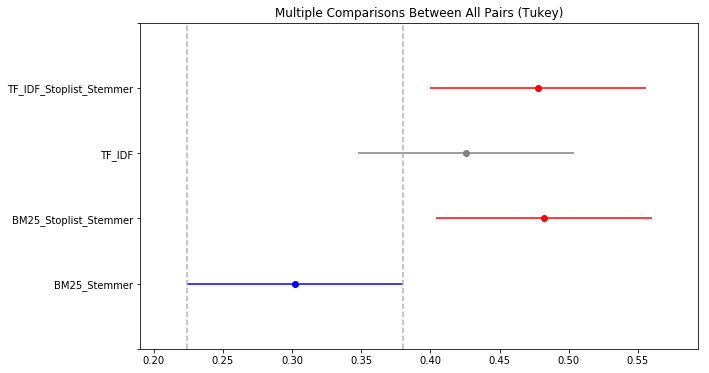

In [15]:
tukeysTest_P_10.plot_simultaneous(comparison_name="BM25_Stemmer")
plt.show()